In [1]:
%matplotlib inline

In [2]:
### Import Packages

import matplotlib.pyplot as plt
import numpy as np
import starry
import pandas as pd
from glob import glob
import os
from scipy.interpolate import interp1d
from scipy.linalg import block_diag
import theano
import theano.tensor as tt
import theano.sparse as ts

np.random.seed(12)
starry.config.lazy = False
starry.config.quiet = True

In [3]:
#### Read in light curves, set an error:
r25_0degree = np.loadtxt("lightcurve_bd/totalflux_r25_0degree.txt")

## Rotation period 2.5 hours 0 degrees (equator on)
r25_0degree_flux = r25_0degree[1]
r25_0degree_flux = r25_0degree_flux/np.median(r25_0degree_flux)
time_r25_0degree =  r25_0degree[0]
sigma=0.001


In [4]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=5, reflected=False)
map.obl = 0
map.inc = 90



In [5]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r25_0degree_flux , C=sigma ** 2)

In [6]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [7]:
nrot=max(time_r25_0degree)/2.5
npts = len(time_r25_0degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r25_0degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [8]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 701 ms, sys: 252 ms, total: 954 ms
Wall time: 6.73 s


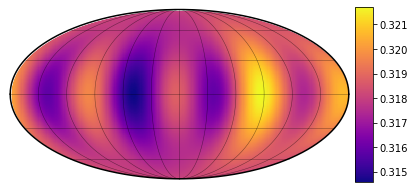

In [9]:
map.show( colorbar=True, projection="moll")

In [10]:
np.random.seed(5)
map.draw()

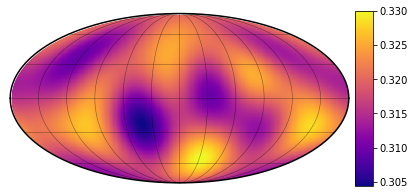

In [11]:
map.show( colorbar=True, projection="moll")

NameError: name 'flux' is not defined

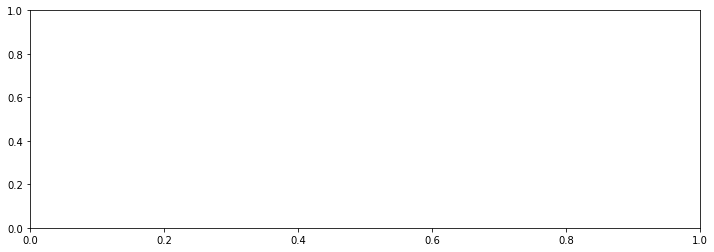

In [12]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r25_0degree, flux)
plt.plot(time_r25_0degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

In [23]:
#### Read in light curves, set an error:
r25_45degree = np.loadtxt("lightcurve_bd/totalflux_r25_45degree.txt")

## Rotation period 2.5 hours 0 degrees (equator on)
r25_45degree_flux = r25_45degree[1]
r25_45degree_flux = r25_45degree_flux/np.median(r25_45degree_flux)
time_r25_45degree =  r25_45degree[0]
sigma=0.001

In [24]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=5, reflected=False)
map.obl = 0
map.inc = 90

In [25]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r25_45degree_flux, C=sigma ** 2)

In [26]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [28]:
nrot=max(time_r25_45degree)/2.5
npts = len(time_r25_45degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r25_45degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [29]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 145 ms, sys: 4.45 ms, total: 150 ms
Wall time: 149 ms


/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


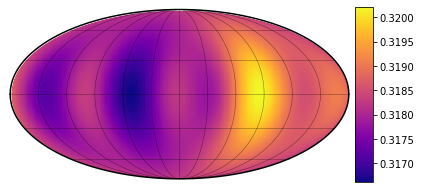

In [30]:
map.show( colorbar=True, projection="moll")

In [31]:
np.random.seed(5)
map.draw()

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


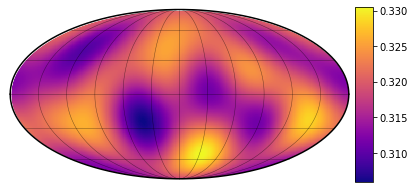

In [32]:
map.show( colorbar=True, projection="moll")

No handles with labels found to put in legend.


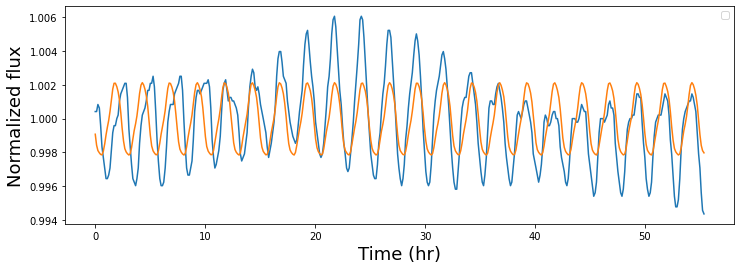

In [33]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r25_45degree, r25_45degree_flux)
plt.plot(time_r25_45degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

In [34]:
#### Read in light curves, set an error:
r25_90degree = np.loadtxt("lightcurve_bd/totalflux_r25_90degree.txt")

## Rotation period 2.5 hours 0 degrees (equator on)
r25_90degree_flux = r25_90degree[1]
r25_90degree_flux = r25_90degree_flux/np.median(r25_90degree_flux)
time_r25_90degree =  r25_90degree[0]
sigma=0.001

In [35]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=5, reflected=False)
map.obl = 0
map.inc = 90

In [36]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r25_90degree_flux, C=sigma ** 2)

In [37]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [38]:
nrot=max(time_r25_90degree)/2.5
npts = len(time_r25_90degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r25_90degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [39]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 161 ms, sys: 9.47 ms, total: 170 ms
Wall time: 185 ms


/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


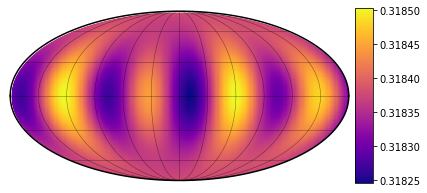

In [40]:
map.show( colorbar=True, projection="moll")

In [41]:
np.random.seed(5)
map.draw()

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


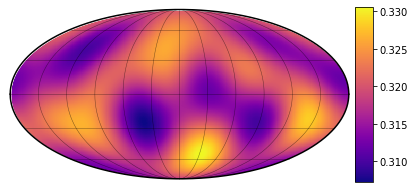

In [42]:
map.show( colorbar=True, projection="moll")

No handles with labels found to put in legend.


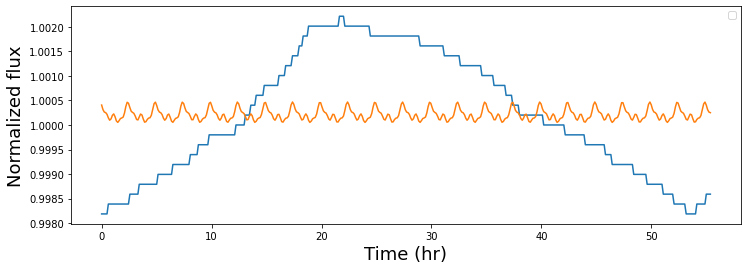

In [43]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r25_90degree, r25_90degree_flux)
plt.plot(time_r25_90degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

In [44]:
#### Read in light curves, set an error:
r5_0degree = np.loadtxt("lightcurve_bd/totalflux_r5_0degree.txt")

## Rotation period 2.5 hours 0 degrees (equator on)
r5_0degree_flux = r5_0degree[1]
r5_0degree_flux = r5_0degree_flux/np.median(r5_0degree_flux)
time_r5_0degree =  r5_0degree[0]
sigma=0.001

In [45]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=5, reflected=False)
map.obl = 0
map.inc = 90

In [46]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r5_0degree_flux, C=sigma ** 2)

In [47]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [48]:
nrot=max(time_r5_0degree)/5
npts = len(time_r5_0degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r5_0degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [49]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 210 ms, sys: 7.33 ms, total: 217 ms
Wall time: 496 ms


/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


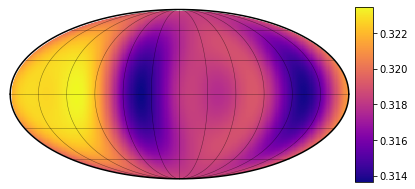

In [50]:
map.show( colorbar=True, projection="moll")

In [51]:
np.random.seed(5)
map.draw()

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


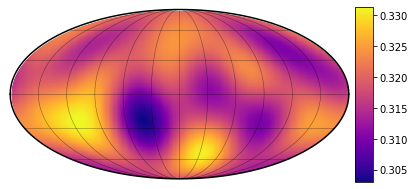

In [52]:
map.show( colorbar=True, projection="moll")

No handles with labels found to put in legend.


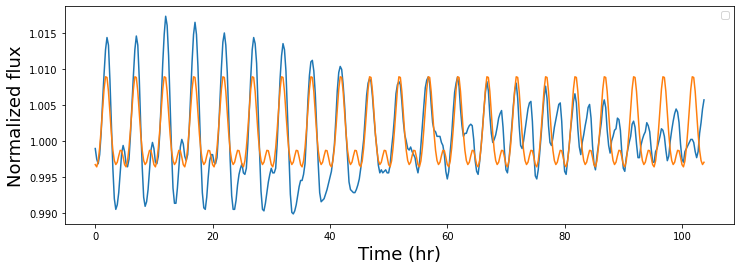

In [54]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r5_0degree, r5_0degree_flux)
plt.plot(time_r5_0degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

In [55]:
#### Read in light curves, set an error:
r5_45degree = np.loadtxt("lightcurve_bd/totalflux_r5_45degree.txt")

## Rotation period 5 hours 45 degrees (equator on)
r5_45degree_flux = r5_45degree[1]
r5_45degree_flux = r5_45degree_flux/np.median(r5_45degree_flux)
time_r5_45degree =  r5_45degree[0]
sigma=0.001

In [56]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=5, reflected=False)
map.obl = 0
map.inc = 90

In [57]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r5_45degree_flux, C=sigma ** 2)

In [58]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [59]:
nrot=max(time_r5_45degree)/5
npts = len(time_r5_45degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r5_45degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [60]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 164 ms, sys: 31 ms, total: 195 ms
Wall time: 201 ms


/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


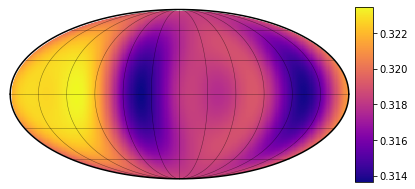

In [61]:
map.show( colorbar=True, projection="moll")

In [62]:
np.random.seed(5)
map.draw()

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


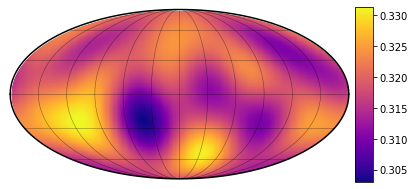

In [63]:
map.show( colorbar=True, projection="moll")

No handles with labels found to put in legend.


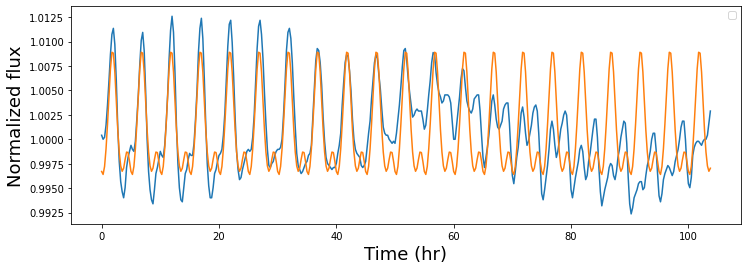

In [65]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r5_45degree, r5_45degree_flux)
plt.plot(time_r5_45degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

In [67]:
#### Read in light curves, set an error:
r5_90degree = np.loadtxt("lightcurve_bd/totalflux_r5_90degree.txt")

## Rotation period 5 hours 90 degrees
r5_90degree_flux = r5_90degree[1]
r5_90degree_flux = r5_90degree_flux/np.median(r5_90degree_flux)
time_r5_90degree =  r5_90degree[0]
sigma=0.001

In [68]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=5, reflected=False)
map.obl = 0
map.inc = 90

In [69]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r5_90degree_flux, C=sigma ** 2)

In [70]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [71]:
nrot=max(time_r5_90degree)/5
npts = len(time_r5_90degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r5_90degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [72]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 164 ms, sys: 15.1 ms, total: 179 ms
Wall time: 195 ms


/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


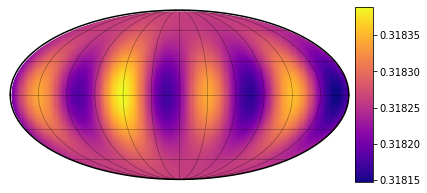

In [73]:
map.show( colorbar=True, projection="moll")

In [74]:
np.random.seed(5)
map.draw()

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


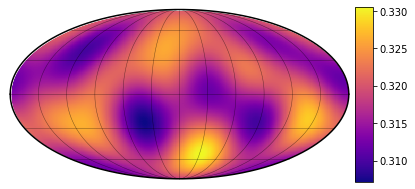

In [75]:
map.show( colorbar=True, projection="moll")

No handles with labels found to put in legend.


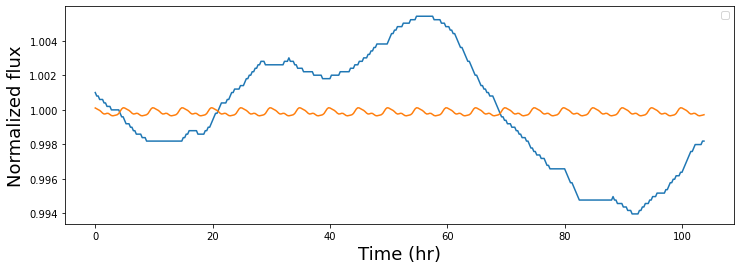

In [77]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r5_90degree, r5_90degree_flux)
plt.plot(time_r5_90degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

In [78]:
#### Read in light curves, set an error:
r10_0degree = np.loadtxt("lightcurve_bd/totalflux_r10_0degree.txt")

## Rotation period 10 hours 0 degrees (equator on)
r10_0degree_flux = r10_0degree[1]
r10_0degree_flux = r10_0degree_flux/np.median(r10_0degree_flux)
time_r10_0degree = r10_0degree[0]
sigma=0.001

In [79]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=5, reflected=False)
map.obl = 0
map.inc = 90

In [80]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r10_0degree_flux, C=sigma ** 2)

In [81]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [123]:
nrot=max(time_r10_0degree)/10
npts = len(time_r10_0degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r10_0degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [124]:
%%time
mu, cho_cov = map.solve(**kwargs)

ValueError: Shape mismatch: A.shape[1] != x.shape[0]
Apply node that caused the error: CGemv{inplace}(Solve{A_structure='upper_triangular', lower=False, overwrite_A=False, overwrite_b=False}.0, TensorConstant{1.0}, Solve{A_structure='upper_triangular', lower=False, overwrite_A=False, overwrite_b=False}.0, <TensorType(float64, vector)>, TensorConstant{1.0})
Toposort index: 16
Inputs types: [TensorType(float64, vector), TensorType(float64, scalar), TensorType(float64, matrix), TensorType(float64, vector), TensorType(float64, scalar)]
Inputs shapes: [(36,), (), (36, 420), (411,), ()]
Inputs strides: [(8,), (), (8, 288), (8,), ()]
Inputs values: ['not shown', array(1.), 'not shown', 'not shown', array(1.)]
Outputs clients: [['output']]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


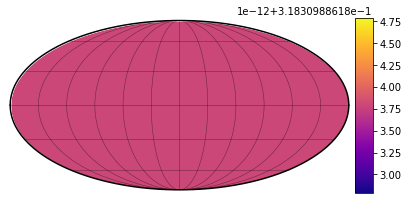

In [125]:
map.show( colorbar=True, projection="moll")

In [85]:
np.random.seed(5)
map.draw()

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


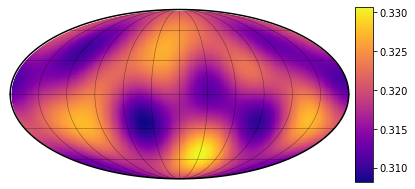

In [86]:
map.show( colorbar=True, projection="moll")

No handles with labels found to put in legend.


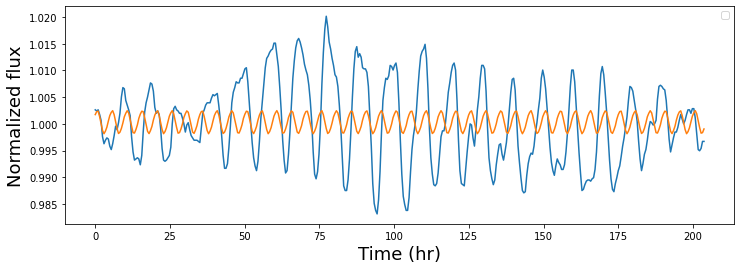

In [87]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r10_0degree, r10_0degree_flux)
plt.plot(time_r10_0degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

In [89]:
#### Read in light curves, set an error:
r10_45degree = np.loadtxt("lightcurve_bd/totalflux_r10_45degree.txt")

## Rotation period 10 hours 45 degrees
r10_45degree_flux = r10_45degree[1]
r10_45degree_flux = r10_45degree_flux/np.median(r10_45degree_flux)
time_r10_45degree = r10_45degree[0]
sigma=0.001

In [90]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=5, reflected=False)
map.obl = 0
map.inc = 90

In [91]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r10_45degree_flux, C=sigma ** 2)

In [92]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [93]:
nrot=max(time_r10_45degree)/5
npts = len(time_r10_45degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r10_45degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [94]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 161 ms, sys: 29.4 ms, total: 190 ms
Wall time: 192 ms


/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


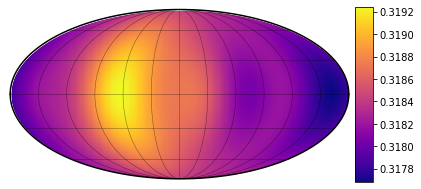

In [95]:
map.show( colorbar=True, projection="moll")

In [96]:
np.random.seed(5)
map.draw()

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


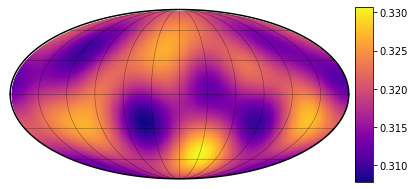

In [97]:
map.show( colorbar=True, projection="moll")

No handles with labels found to put in legend.


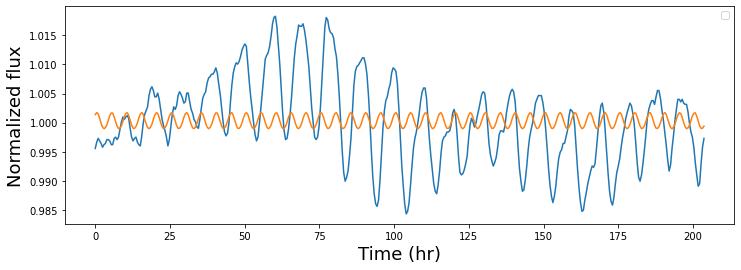

In [98]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r10_45degree, r10_45degree_flux)
plt.plot(time_r10_45degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

In [99]:
#### Read in light curves, set an error:
r10_90degree = np.loadtxt("lightcurve_bd/totalflux_r10_90degree.txt")

## Rotation period 10 hours 90 degrees
r10_90degree_flux = r10_90degree[1]
r10_90degree_flux = r10_90degree_flux/np.median(r10_90degree_flux)
time_r10_90degree = r10_90degree[0]
sigma=0.001

In [100]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=5, reflected=False)
map.obl = 0
map.inc = 90

In [101]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r10_90degree_flux, C=sigma ** 2)

In [102]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [103]:
nrot=max(time_r10_90degree)/5
npts = len(time_r10_90degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r10_90degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [104]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 150 ms, sys: 4.56 ms, total: 155 ms
Wall time: 154 ms


/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


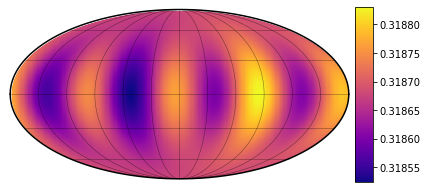

In [105]:
map.show( colorbar=True, projection="moll")

In [106]:
np.random.seed(5)
map.draw()

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


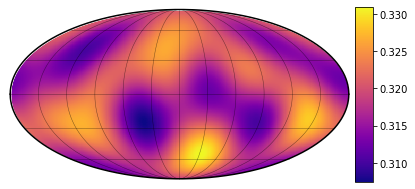

In [107]:
map.show( colorbar=True, projection="moll")

No handles with labels found to put in legend.


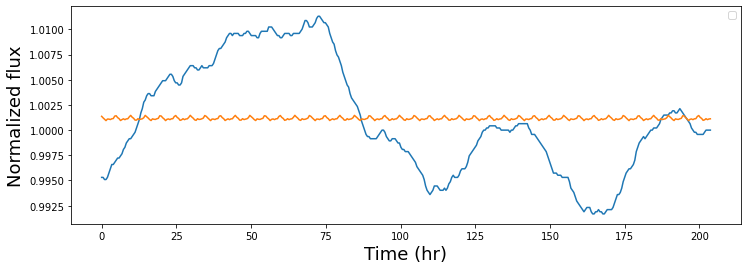

In [108]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r10_90degree, r10_90degree_flux)
plt.plot(time_r10_90degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

In [109]:
#### Read in light curves, set an error:
r20_0degree = np.loadtxt("lightcurve_bd/totalflux_r20_0degree.txt")

## Rotation period 20 hours 0 degrees
r20_0degree_flux = r20_0degree[1]
r20_0degree_flux = r20_0degree_flux/np.median(r20_0degree_flux)
time_r20_0degree = r20_0degree[0]
sigma=0.001

In [110]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=5, reflected=False)
map.obl = 0
map.inc = 90

In [111]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r20_0degree_flux, C=sigma ** 2)

In [112]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [113]:
nrot=max(time_r20_0degree)/5
npts = len(time_r20_0degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r20_0degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [114]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 157 ms, sys: 4.59 ms, total: 161 ms
Wall time: 161 ms


/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


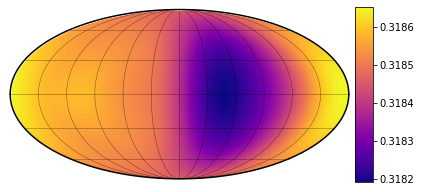

In [115]:
map.show( colorbar=True, projection="moll")

In [116]:
np.random.seed(5)
map.draw()

In [130]:
map.show( colorbar=True, projection="moll",dpi=300,file="map.png")

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


No handles with labels found to put in legend.


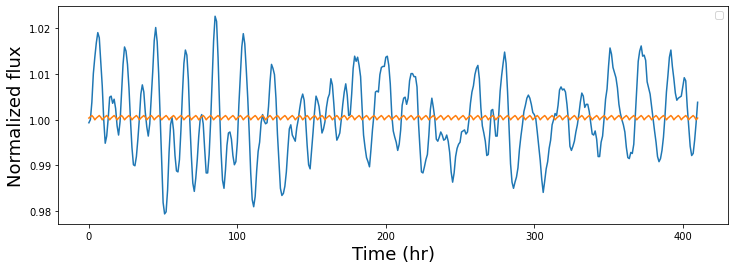

In [118]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r20_0degree, r20_0degree_flux)
plt.plot(time_r20_0degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

In [119]:
#### Read in light curves, set an error:
r20_45degree = np.loadtxt("lightcurve_bd/totalflux_r20_45degree.txt")

## Rotation period 20 hours 0 degrees
r20_45degree_flux = r20_45degree[1]
r20_45degree_flux = r20_45degree_flux/np.median(r20_45degree_flux)
time_r20_45degree = r20_45degree[0]
sigma=0.001

In [120]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=5, reflected=False)
map.obl = 0
map.inc = 90

In [121]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r20_45degree_flux, C=sigma ** 2)

In [122]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [ ]:
nrot=max(time_r20_degree)/5
npts = len(time_r20_0degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r20_0degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)